<a href="https://colab.research.google.com/github/Folasewa/EmoAI_facerecognition/blob/main/Final_EmoAI_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics==8.0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.7/214.7 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.4 MB/s eta 0:00:00


In [4]:
import os
from ultralytics import YOLO

In [5]:
!pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00


In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="jUksJerIsafXNaR1DLEz")
project = rf.workspace().project("faceemo")
model = project.version(2).model

# infer on a local image
print(model.predict("/content/907001100.jpg", confidence=40, overlap=30).json())



loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 386.5, 'y': 240.0, 'width': 505.0, 'height': 480.0, 'confidence': 0.5726426243782043, 'class': 'confusion', 'image_path': '/content/907001100.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '640', 'height': '480'}}


In [8]:
# visualize your prediction
model.predict("/content/907001100.jpg", confidence=40, overlap=30).save("prediction.jpg")


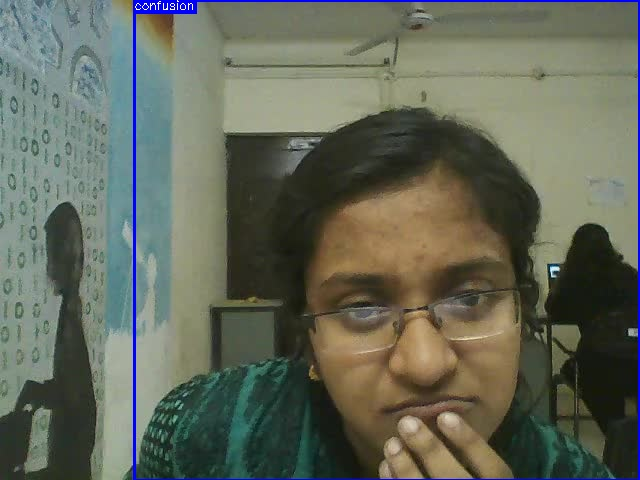

In [9]:
from IPython.display import Image
display(Image("prediction.jpg", width=600))


In [10]:
#inferring on a video
#installing ffmpeg
!pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=285b185df92dc71f74c5c909c1301d2bcb7d3121dffe52e1655d35f73073e2da
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


Creating folders for the videos

In [11]:
%cd /content/
!mkdir videos_to_infer
!mkdir inferred_videos
!mkdir videos_to_images
%cd videos_to_infer

/content
/content/videos_to_infer


In [12]:
# copy your videos from drive to /content/
!cp /content/drive/MyDrive/Classroom_video.mp4 /content/videos_to_images

In [13]:
# break video down into images

os.environ['inputFile'] = '/content/videos_to_infer/Classroom_video.mp4'

In [14]:
# fps value: the number of frames to sample per second from the video

!ffmpeg  -hide_banner -loglevel error -i "/content/drive/MyDrive/Classroom_video.mp4" -vf fps=5 "$Classroom_video_out%04d.png"

In [15]:
from roboflow import Roboflow
import json
from time import sleep
from PIL import Image, ImageDraw
import io
import base64
import requests
from os.path import exists
import os, sys, re, glob

In [40]:
# HELPER FUNCTIONS BLOCK
def draw_boxes(box, x0, y0, img, class_name):
    # OPTIONAL - color map, change the key-values for each color to make the
    # class output labels specific to your dataset
    color_map = {
        "engaged":"purple",
        "boredom":"pink",
        "confusion":"orange",
        "frustration":"blue",
        "distracted": "green"
    }

    # get position coordinates
    bbox = ImageDraw.Draw(img)

    bbox.rectangle(box, outline =color_map[class_name], width=5)
    bbox.text((x0, y0), class_name, fill='black', anchor='mm')

    return img

def save_with_bbox_renders(img):
    file_name = os.path.basename(img.filename)
    img.save('/content/inferred_videos/' + file_name)

In [41]:
# perform inference on each image from the split up video

%cd /content/inferred_videos
!pwd


/content/inferred_videos
/content/inferred_videos


In [20]:
!pwd

/content/inferred_videos


In [42]:
%cd ..
%cd ..

/content
/


In [43]:
%cd content/videos_to_infer
!ls
%cd ..
%cd ..

/content/videos_to_infer
0001.png  0017.png  0033.png  0049.png	0065.png  0081.png  0097.png  0113.png
0002.png  0018.png  0034.png  0050.png	0066.png  0082.png  0098.png  0114.png
0003.png  0019.png  0035.png  0051.png	0067.png  0083.png  0099.png  0115.png
0004.png  0020.png  0036.png  0052.png	0068.png  0084.png  0100.png  0116.png
0005.png  0021.png  0037.png  0053.png	0069.png  0085.png  0101.png  0117.png
0006.png  0022.png  0038.png  0054.png	0070.png  0086.png  0102.png  0118.png
0007.png  0023.png  0039.png  0055.png	0071.png  0087.png  0103.png  0119.png
0008.png  0024.png  0040.png  0056.png	0072.png  0088.png  0104.png  0120.png
0009.png  0025.png  0041.png  0057.png	0073.png  0089.png  0105.png  0121.png
0010.png  0026.png  0042.png  0058.png	0074.png  0090.png  0106.png  0122.png
0011.png  0027.png  0043.png  0059.png	0075.png  0091.png  0107.png  0123.png
0012.png  0028.png  0044.png  0060.png	0076.png  0092.png  0108.png  0124.png
0013.png  0029.png  0045.png  0061.png	

In [44]:
# glob config values
!pwd
file_path = "/content/videos_to_infer"
extension = ".png"
res =[]
for path in os.listdir(file_path):
    #check if current path is a file
    if os.path.isfile(os.path.join(file_path, path)):
        res.append(os.path.join(file_path, path))
print(res)
# glob files based on location and file format
globbed_files = sorted(glob.glob(file_path + '*' + extension))
print(globbed_files)

for image in res:
  # INFERENCE
  predictions = model.predict(image).json()['predictions']
  newly_rendered_image = Image.open(image)

  # RENDER
  # for each detection, create a crop and convert into CLIP encoding
  print(predictions)
  for prediction in predictions:
      # rip bounding box coordinates from current detection
      # note: infer returns center points of box as (x,y) and width, height
      # ----- but pillow crop requires the top left and bottom right points to crop
      x0 = prediction['x'] - prediction['width'] / 2
      x1 = prediction['x'] + prediction['width'] / 2
      y0 = prediction['y'] - prediction['height'] / 2
      y1 = prediction['y'] + prediction['height'] / 2
      box = (x0, y0, x1, y1)

      newly_rendered_image = draw_boxes(box, x0, y0, newly_rendered_image, prediction['class'])

  # WRITE
  save_with_bbox_renders(newly_rendered_image)

/
['/content/videos_to_infer/0011.png', '/content/videos_to_infer/0085.png', '/content/videos_to_infer/0040.png', '/content/videos_to_infer/0076.png', '/content/videos_to_infer/0059.png', '/content/videos_to_infer/0065.png', '/content/videos_to_infer/0079.png', '/content/videos_to_infer/0117.png', '/content/videos_to_infer/0070.png', '/content/videos_to_infer/0067.png', '/content/videos_to_infer/0105.png', '/content/videos_to_infer/0048.png', '/content/videos_to_infer/0062.png', '/content/videos_to_infer/0063.png', '/content/videos_to_infer/0108.png', '/content/videos_to_infer/0024.png', '/content/videos_to_infer/0032.png', '/content/videos_to_infer/0054.png', '/content/videos_to_infer/0103.png', '/content/videos_to_infer/0060.png', '/content/videos_to_infer/0115.png', '/content/videos_to_infer/0001.png', '/content/videos_to_infer/0074.png', '/content/videos_to_infer/0008.png', '/content/videos_to_infer/0096.png', '/content/videos_to_infer/0057.png', '/content/videos_to_infer/0049.png'

In [46]:
# stich images together into video
#frames = 8 however, the cells above, i used 5
#/content/drive/MyDrive/Classroom_video.mp40001.png
!pwd
!ffmpeg -r 8 -s 1920x1080 -i /content/inferred_videos/%04d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p Classroom_video.mp4

/
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis -